In [23]:
import pandas as pd 
import re

In [24]:
f = open('SMSSpamCollection' , 'r' , encoding='utf-8')
data = f.read()

In [25]:
pat1 = "(ham)|(spam)"
splitd_data = re.split(pat1 , data)[1:]

In [26]:
clas = []
mail = []
for i in range(len(splitd_data)):
    if i%3 ==1 or i%3==0:
        if not splitd_data[i]==None:
            clas.append(splitd_data[i])
    if i%3 == 2:
        mail.append(splitd_data[i].strip('\t').strip('\n'))

In [27]:
df = pd.DataFrame({  "text":mail , "target":clas })

In [28]:
df.sample(10)

,text,target
3809,"Are you sure you don't mean ""get here, we made...",ham
2153,You stayin out of trouble stranger!!saw Dave t...,ham
2693,"New Tones This week include: 1)McFly-All Ab..,...",spam
3322,Ee msg na poortiyagi odalebeku: Hanumanji 7 na...,ham
609,XCLUSIVE@CLUBSAISAI 2MOROW 28/5 SOIREE SPECIAL...,spam
4073,I was slept that time.you there?,ham
1991,Hey i will be late... i'm at amk. Need to drin...,ham
1696,Nan sonathaya soladha. Why boss?,ham
3664,* Thought I didn't see you.,ham
615,I have many dependents,ham


In [29]:
from sklearn.preprocessing import LabelEncoder 

In [30]:
encoder = LabelEncoder()

In [31]:
df.target = encoder.fit_transform(df['target'])

In [32]:
df.head()

,text,target
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0



# 2. EDA

In [33]:
df['target'].value_counts()

target
0    4851
1     748
Name: count, dtype: int64

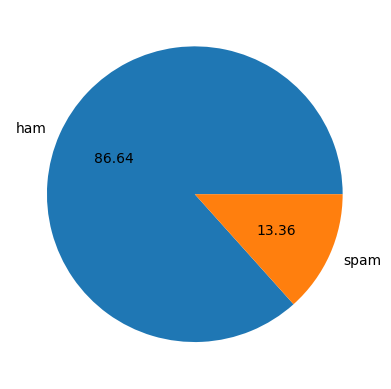

In [34]:
import matplotlib.pyplot as plt

plt.pie(df['target'].value_counts() , labels=['ham' , 'spam'] , autopct='%0.2f')
plt.show()

# Data is Imbalanced



In [35]:
import nltk

In [36]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Bannu\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [37]:
df['num_characters']=df['text'].apply(len)

In [38]:
df

,text,target,num_characters
0,"Go until jurong point, crazy.. Available only ...",0,111
1,Ok lar... Joking wif u oni...,0,29
2,Free entry in 2 a wkly comp to win FA Cup fina...,1,155
3,U dun say so early hor... U c already then say...,0,49
4,"Nah I don't think he goes to usf, he lives aro...",0,61
...,...,...,...
5594,This is the 2nd time we have tried 2 contact u...,1,160
5595,Will ü b going to esplanade fr home?,0,36
5596,"Pity, * was in mood for that. So...any other s...",0,57
5597,The guy did some bitching but I acted like i'd...,0,125


In [39]:
# Fetch Number Of words

df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))


In [40]:
#  Sentnce
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [41]:
df

,text,target,num_characters,num_words,num_sentences
0,"Go until jurong point, crazy.. Available only ...",0,111,24,2
1,Ok lar... Joking wif u oni...,0,29,8,2
2,Free entry in 2 a wkly comp to win FA Cup fina...,1,155,37,2
3,U dun say so early hor... U c already then say...,0,49,13,1
4,"Nah I don't think he goes to usf, he lives aro...",0,61,15,1
...,...,...,...,...,...
5594,This is the 2nd time we have tried 2 contact u...,1,160,35,4
5595,Will ü b going to esplanade fr home?,0,36,9,1
5596,"Pity, * was in mood for that. So...any other s...",0,57,15,2
5597,The guy did some bitching but I acted like i'd...,0,125,27,1


In [42]:
df[['num_characters',	'num_words',	'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5599.000000,5599.000000,5599.000000
mean,80.105376,18.772102,2.001429
std,59.755411,13.825413,1.536852
min,1.000000,1.000000,1.000000
25%,35.000000,9.000000,1.000000
50%,61.000000,15.000000,2.000000
75%,122.000000,27.000000,2.000000
max,910.000000,220.000000,38.000000


In [43]:
df[df['target']==1][['num_characters',	'num_words',	'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,748.000000,748.000000,748.000000
mean,138.207219,27.906417,3.030749
std,29.449862,6.958997,1.548974
min,6.000000,1.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,223.000000,46.000000,9.000000


In [44]:
import seaborn as sns 

<Axes: xlabel='num_characters', ylabel='Count'>

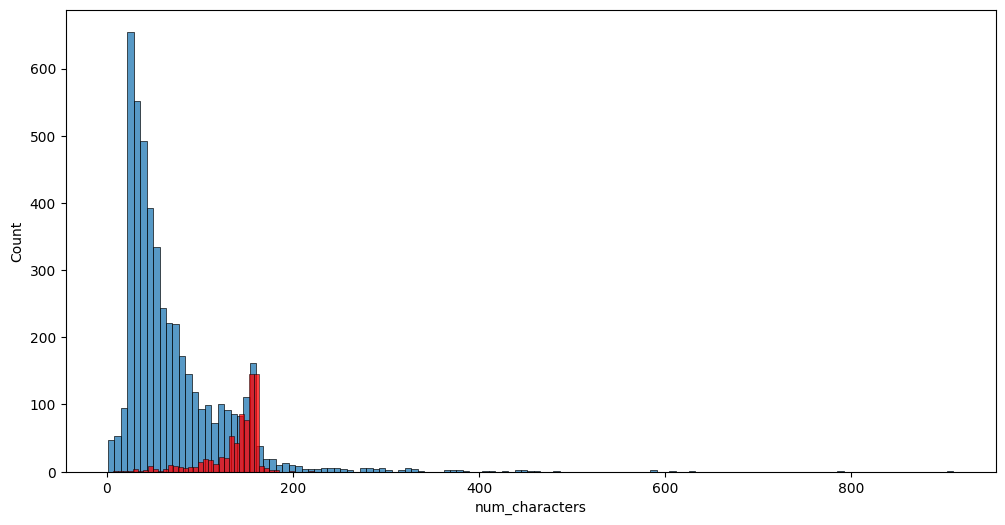

In [45]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'],color='r')

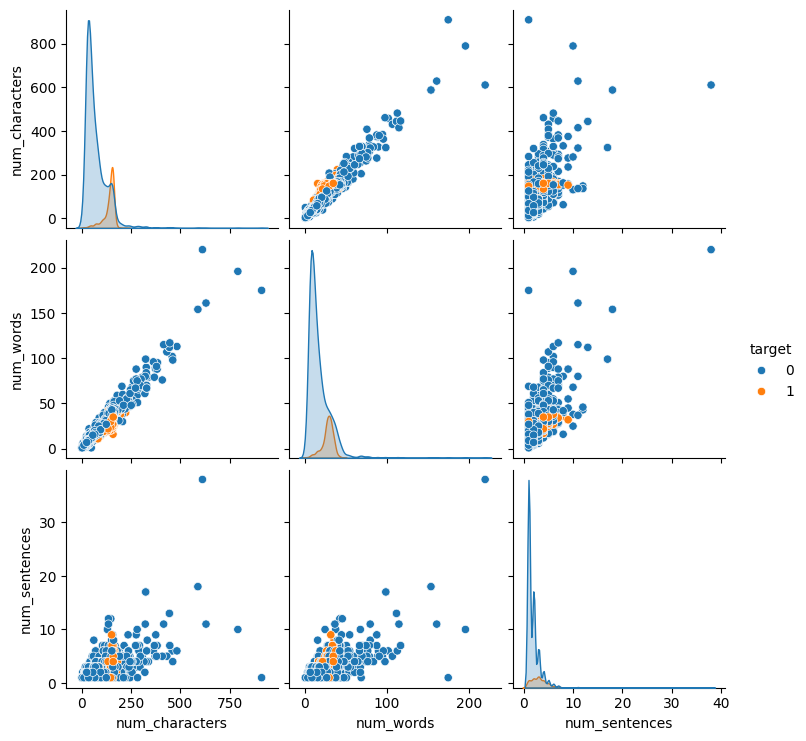

In [46]:

sns.pairplot(df,hue='target')

# Data Preprocessing
- Lower case
- Tokenization
- Removing special character 
- Removing Stop words and Punctuation 
- Stemming

In [47]:
from nltk.corpus import stopwords
nltk.download('stopwords')
# stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Bannu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [48]:
import string
# string.punctuation

In [49]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [50]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))
    
    return " ".join(y)

In [51]:
transform_text(df.text[8])


'winner valu network custom select receivea prize reward claim call claim code kl341 valid 12 hour'

In [52]:

df['transform_text'] = df['text'].apply(transform_text)

In [53]:
df.head()

,text,target,num_characters,num_words,num_sentences,transform_text
0,"Go until jurong point, crazy.. Available only ...",0,111,24,2,go jurong point crazi avail bugi n great world...
1,Ok lar... Joking wif u oni...,0,29,8,2,ok lar joke wif u oni
2,Free entry in 2 a wkly comp to win FA Cup fina...,1,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,U dun say so early hor... U c already then say...,0,49,13,1,u dun say earli hor u c alreadi say
4,"Nah I don't think he goes to usf, he lives aro...",0,61,15,1,nah think goe usf live around though


In [54]:
from wordcloud import WordCloud
wc = WordCloud(height=500 , width=500 , min_font_size=10 , background_color='white')

In [55]:
spam_wc = wc.generate(df[df['target']==1]['transform_text'].str.cat(sep=' '))

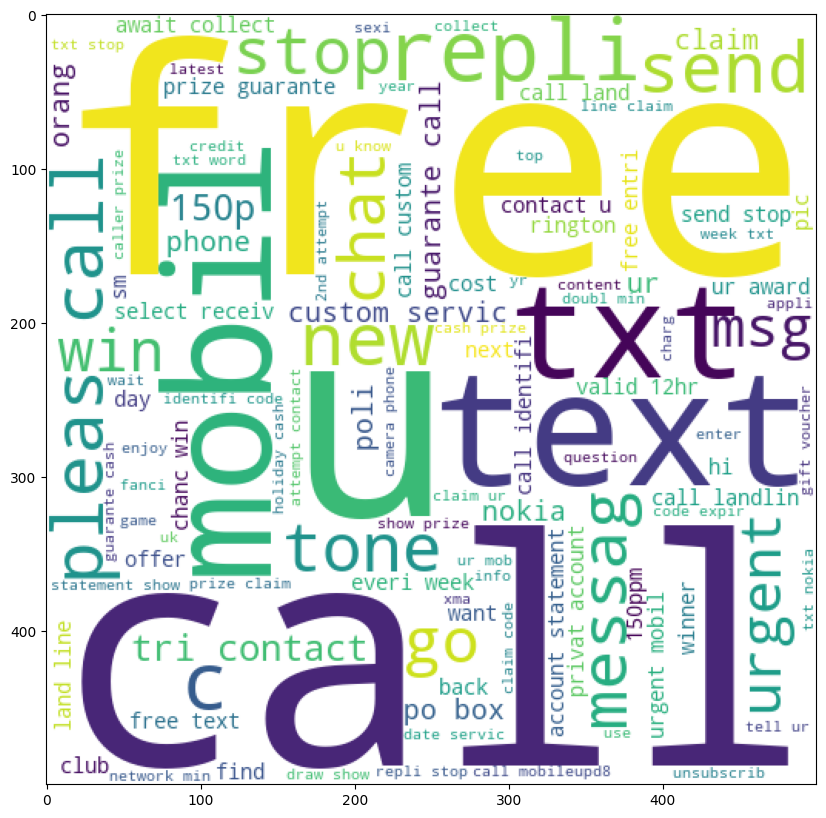

In [56]:
plt.figure(figsize=(10,10))
plt.imshow(spam_wc)

In [57]:
ham_wc = wc.generate(df[df['target']==0]['transform_text'].str.cat(sep=' '))

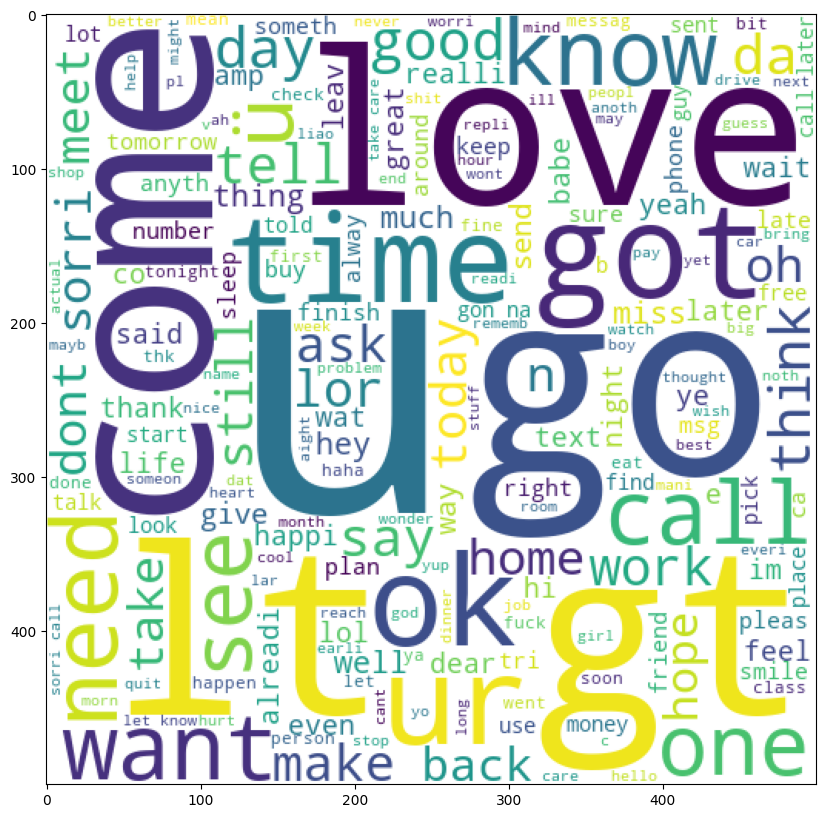

In [58]:
plt.figure(figsize=(10,10))
plt.imshow(ham_wc)

In [59]:
spam_corpus = []
for msg in df[df['target']==1]['transform_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
        

In [60]:
spam_corpus

['free',
 'entri',
 '2',
 'wkli',
 'comp',
 'win',
 'fa',
 'cup',
 'final',
 'tkt',
 '21st',
 'may',
 'text',
 'fa',
 '87121',
 'receiv',
 'entri',
 'question',
 'std',
 'txt',
 'rate',
 'c',
 'appli',
 '08452810075over18',
 'freemsg',
 'hey',
 'darl',
 '3',
 'week',
 'word',
 'back',
 'like',
 'fun',
 'still',
 'tb',
 'ok',
 'xxx',
 'std',
 'chg',
 'send',
 'rcv',
 'winner',
 'valu',
 'network',
 'custom',
 'select',
 'receivea',
 'prize',
 'reward',
 'claim',
 'call',
 'claim',
 'code',
 'kl341',
 'valid',
 '12',
 'hour',
 'mobil',
 '11',
 'month',
 'u',
 'r',
 'entitl',
 'updat',
 'latest',
 'colour',
 'mobil',
 'camera',
 'free',
 'call',
 'mobil',
 'updat',
 'co',
 'free',
 '08002986030',
 'six',
 'chanc',
 'win',
 'cash',
 '100',
 'pound',
 'txt',
 'csh11',
 'send',
 'cost',
 '6day',
 'tsandc',
 'appli',
 'repli',
 'hl',
 '4',
 'info',
 'urgent',
 '1',
 'week',
 'free',
 'membership',
 'prize',
 'jackpot',
 'txt',
 'word',
 'claim',
 '81010',
 'c',
 'lccltd',
 'pobox',
 '4403ldnw

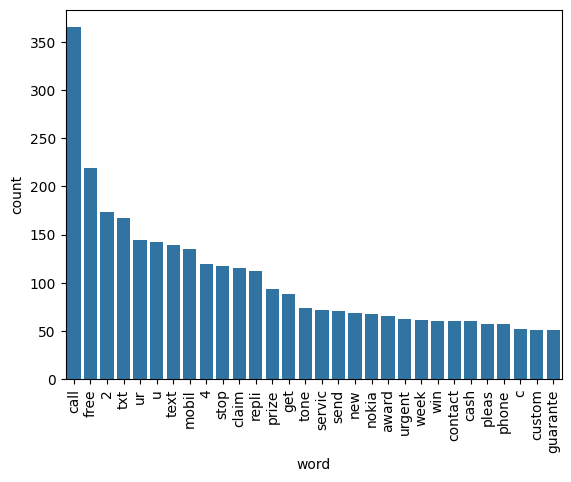

In [61]:
from collections import Counter

spam_counter = Counter(spam_corpus)

# Get the 30 most common words and their counts
most_common_words = spam_counter.most_common(30)

# Convert to a DataFrame
df_most_common = pd.DataFrame(most_common_words, columns=['word', 'count'])

# Plot using seaborn
sns.barplot(x='word', y='count', data=df_most_common)
plt.xticks(rotation='vertical')
plt.show()

In [62]:
ham_corpus = []
for msg in df[df['target']==0]['transform_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

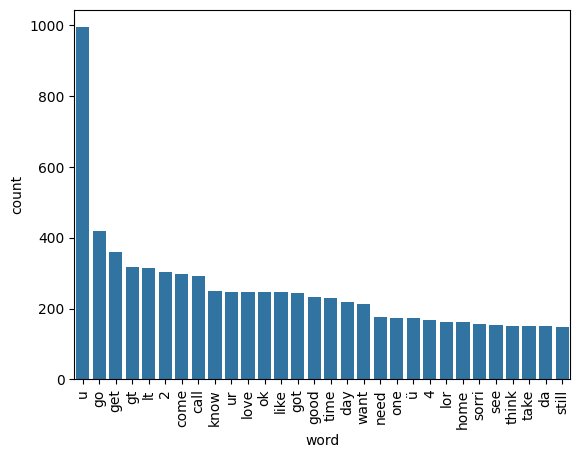

In [63]:
from collections import Counter

ham_counter = Counter(ham_corpus)

# Get the 30 most common words and their counts
most_common_words = ham_counter.most_common(30)

# Convert to a DataFrame
df_most_common = pd.DataFrame(most_common_words, columns=['word', 'count'])

# Plot using seaborn
sns.barplot(x='word', y='count', data=df_most_common)
plt.xticks(rotation='vertical')
plt.show()

#  4. Model Building

In [244]:
from sklearn.feature_extraction.text import CountVectorizer , TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=6000)

In [245]:
X = tfidf.fit_transform(df['transform_text']).toarray()
y = df['target'].values


In [247]:
X.shape

(5599, 6000)

In [248]:
from sklearn.model_selection import train_test_split

In [249]:
X_train,X_test , y_train ,y_test = train_test_split(X,y , test_size=0.2,random_state=2)

In [250]:
from sklearn.naive_bayes import GaussianNB , MultinomialNB , BernoulliNB
from sklearn.metrics import accuracy_score , confusion_matrix , precision_score

In [251]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [252]:
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test , y_pred1))
print(confusion_matrix(y_test , y_pred1))
print(precision_score(y_test , y_pred1))

0.875
[[862 125]
 [ 15 118]]
0.48559670781893005


In [253]:
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test , y_pred2))
print(confusion_matrix(y_test , y_pred2))
print(precision_score(y_test , y_pred2))

0.975
[[987   0]
 [ 28 105]]
1.0


In [254]:
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test , y_pred3))
print(confusion_matrix(y_test , y_pred3))
print(precision_score(y_test , y_pred3))

0.98125
[[985   2]
 [ 19 114]]
0.9827586206896551


In [91]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier , AdaBoostClassifier , BaggingClassifier , ExtraTreesClassifier , GradientBoostingClassifier


In [75]:
svc = SVC(kernel='sigmoid' , gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear' ,penalty='l1')
rfc = RandomForestClassifier(n_estimators=50 , random_state=2)
abc = AdaBoostClassifier(n_estimators=50 , random_state=2)
bc = BaggingClassifier(n_estimators=50  , random_state=2)
etc = ExtraTreesClassifier(n_estimators=50 , random_state=2)
gbc = GradientBoostingClassifier(n_estimators=50 , random_state=2)

In [76]:
clfs = {
    'SVC' : svc ,
    'KN' : knc,
    'NB' : mnb,
    'DT' : dtc ,
    'LR' : lrc ,
    'RF' : rfc ,
    'AdaBoost' : abc ,
    'BgC' : bc ,
    'ETC' :etc ,
    'GBDT' : gbc
}

In [77]:
def train_classifier(clf , X_train , y_train , X_test , y_test):
    clf.fit(X_train , y_train)
    y_pred= clf.predict(X_test)
    accuracy = accuracy_score(y_test ,y_pred)
    precision = precision_score(y_test , y_pred)
    return accuracy , precision

In [78]:
accuracy = []
precision = []

for name , clf in clfs.items():
    a , p =train_classifier(clf , X_train , y_train , X_test , y_test)
    accuracy.append(a)
    precision.append(p)
    
    print('Name : ' ,name)
    print('accuracy : ',a)
    print('precision : ',p)


Name :  SVC
accuracy :  0.9830357142857142
precision :  0.975
Name :  KN
accuracy :  0.9276785714285715
precision :  1.0
Name :  NB
accuracy :  0.9839285714285714
precision :  0.9914529914529915
Name :  DT
accuracy :  0.9392857142857143
precision :  0.782608695652174
Name :  LR
accuracy :  0.9678571428571429
precision :  0.944954128440367
Name :  RF
accuracy :  0.98125
precision :  1.0
Name :  AdaBoost
accuracy :  0.9732142857142857
precision :  0.912
Name :  BgC
accuracy :  0.9642857142857143
precision :  0.8661417322834646
Name :  ETC
accuracy :  0.9839285714285714
precision :  0.9831932773109243
Name :  GBDT
accuracy :  0.9589285714285715
precision :  0.8990825688073395


In [79]:

performance_df = pd.DataFrame({'models' : clfs.keys()  , 'Accuracy' : accuracy , "Precision":precision} ).sort_values('Precision' , ascending=False)

In [80]:
performance_df

,models,Accuracy,Precision
1,KN,0.927679,1.000000
5,RF,0.981250,1.000000
2,NB,0.983929,0.991453
8,ETC,0.983929,0.983193
0,SVC,0.983036,0.975000
4,LR,0.967857,0.944954
6,AdaBoost,0.973214,0.912000
9,GBDT,0.958929,0.899083
7,BgC,0.964286,0.866142
3,DT,0.939286,0.782609


In [256]:
import pickle

pickle.dump(tfidf, open('vectorizer.pkl' , 'wb'))
pickle.dump(mnb,open('model.pkl', 'wb'))
